# Climate Data Store (CDS) - Example Frontend

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to demonstrate the access and usability of the proposed data delivering service. Example usage of the Climate Data Store (CDS) Frontend for Radiosonde data.

    Author: M. Blaschek
    Date: 07.2020
    Contact: michael.blaschek [at] univie.ac.at
    License: C3S, 2020
    Update: 04.2021

In [4]:
# check if necessary packages are installed
# it is recommened to use an anaconda distribution of python
# installing cartopy depends on proj lib, maybe use conda_forge
!pip -q install numpy pandas xarray matplotlib h5py cartopy

In [1]:
# Notebook plotting
%pylab inline
import warnings
warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


# Functionality via the CDSAPI

The backend is called via the `cdsapi` and requests the data.

The frontend returns one zip file, which contains either:
- CF 1.7 compliant netCDF4 files (one per station and per variable).
- CSV files (one per variable)
    

A typical request should contain:
1. **statid** - the Station Identifier
    * e.g. `'11035' or ['11035','72357'] or 'all'`
2. **date** - Date
    * e.g. `YYYYMMDD like 19990131`
2. **year** - Year
    * e.g. `1999`
3. **month** - Month
    * e.g. `02`
4. **day** - Day
    * e.g. `01, 02, ...`
5. **period** - datetime range
    * e.g. `a range '1999-01-01/1999-12-31'  for all data in 1999'
6. **pressure_level** - selection of pressure levels in hPa
    * e.g. `one level ['850'] or ['500', '850'] or no keyword for all significant levels`
7. **variable** - selection of variables 
    * e.g. `air_temperature, air_relative_humidity, air_specific_humidity, air_dewpoint, zonal_wind, meridional_wind, wind_speed, wind_direction`
8. **optional**  - feedback information from reanalysis
    * e.g. `obs_minus_an, obs_minus_bg, bias_estimate, ...`
9. **country** - request all stations from a country
    * e.g. `DEU, USA, GBR, ...`
10. **bbox** - request all stations within a bounding box 
    * e.g. `[lower left upper right] like [40 0 50 20] for Europe`
    * `lower<upper, left<right, -90<=lat<=90, -180<=lon<=360`
11. **version** - version number of the product, default: most recent
    * e.g. 1.0
12. **format** - Output format
    * e.g. `nc` or `csv`

## CDSAPI Access

The CDSAPI requires a `.cdsapirc` file. Please [register](https://cds.climate.copernicus.eu/user/register?destination=%2F%23!%2Fhome) at the CDS and follow the "[How-to](https://cds.climate.copernicus.eu/api-how-to)" to allow the API access.

## Example Request - One Profile

The requested data will be downloaded and unzipped into the `example_data` directory.

**Update: Please note that the request did hardly change from the backend-version.** Which can be found here: [Example-backend](https://github.com/MBlaschek/CEUAS/blob/master/CEUAS/public/cds-backend/Example.ipynb)

In [2]:
import cdsapi, zipfile, os, time
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning) # just cosmetics

# Please note: Server URL will be omitted, once published
c = cdsapi.Client(url='https://sis-dev.climate.copernicus.eu/api/v2')

In [3]:
t0 = time.time()
# Start Request
r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
               {
                   'variable': ["air_temperature", "air_relative_humidity"],
                   'year': '2000',
                   'month':'02',
                   'day':'01',
                   'statid': '10393',
                   'optional': ["obs_minus_bg", "obs_minus_an", "bias_estimate"],
               })
# Start Download
r.download(target='download.zip')
# Check file size
assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
# Unzip the Data Stream
z = zipfile.ZipFile('download.zip')
print("Unzipping retrieved files: to ./exampla_data/1")
print(z.namelist())
z.extractall(path='./example_data/1')
z.close()
os.remove('download.zip')
print("Time elapsed: ", time.time()-t0, "s")

2021-06-25 14:40:10,601 INFO Welcome to the CDS
2021-06-25 14:40:10,602 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-06-25 14:40:11,398 INFO Request is queued
2021-06-25 14:40:12,436 INFO Request is completed
2021-06-25 14:40:12,438 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1624624811.7468402-3763-21-6a938fa6-ff91-41fc-98ef-4c798a39c9ef.zip to download.zip (98.4K)
2021-06-25 14:40:12,590 INFO Download rate 651.2K/s


Unzipping retrieved files: to ./exampla_data/1
['dest_0-20001-0-10393_air_temperature.nc', 'dest_0-20001-0-10393_relative_humidity.nc']
Time elapsed:  2.2959697246551514 s


In [4]:
# Show the new downloaded files in example_data directory
!ls -Rlh example_data/1

example_data/1:
total 100K
-rw-r--r--. 1 mblaschek users 51K Jun 25 14:40 dest_0-20001-0-10393_air_temperature.nc
-rw-r--r--. 1 mblaschek users 48K Jun 25 14:40 dest_0-20001-0-10393_relative_humidity.nc


## Retrieved files

In [5]:
import xarray as xr

2021-06-25 14:40:18,988 INFO ecCodes library found using name '/usr/local/lib/libeccodes.so'.


In [6]:
# Open Netcdf with Xarray
tdata = xr.open_dataset('example_data/1/dest_0-20001-0-10393_air_temperature.nc')
print(tdata)

<xarray.Dataset>
Dimensions:           (obs: 197, string11: 11, string14: 14, string20: 20, time: 197, trajectory: 4)
Coordinates:
    lat               (obs) float32 ...
    lon               (obs) float32 ...
  * obs               (obs) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    plev              (obs) float32 ...
  * string11          (string11) |S1 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
  * string14          (string14) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
  * string20          (string20) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
  * time              (time) datetime64[ns] 2000-02-01T05:00:00 ... 2000-02-0...
  * trajectory        (trajectory) int32 0 0 0 0
Data variables:
    bias_estimate     (obs) float32 ...
    obs_minus_an      (obs) float32 ...
    obs_minus_bg      (obs) float32 ...
    report_id         (obs, string11) |S1 ...
    station_id        (obs, string20) |S1 ...
    ta                (obs) float32 ...
    trajectory_index  (obs) 

## Variables

Notice that there are the following variables:
* `bias_estimate` - Reanalysis Bias estimate
* `obs_min_an` - Analysis Departures
* `obs_min_bg` - First Guess Departures
* `ta` - Observations, e.g. Air Temperature
* `trajectory_index` - unique profile identifier, where each observation belongs to
* `trajectory_label` - unique profile label, as in the CDM tables
* `report_id` - Report Identification Number pointing to the original dataset
* `station_id` - Station Name

Notice as well the Dimensions:
* `obs` - Dimension that corresponds to a record lenght (all profiles together)
* `trajectory`  - Dimension that corresponds to a number of individual profiles

and Coordinates:
* `lat` - Coordinate Information Latitude
* `lon` - Coordinate Information Longitude
* `plev` - Coordinate Information pressure
* `time` - Coordinate Information time

## Request a csv file

In [7]:
t0 = time.time()
# Start Request
r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
               {
                   'variable': ["air_temperature", "air_relative_humidity"],
                   'year': '2000',
                   'month':'02',
                   'day':'01',
                   'statid': '10393',
                   'format': 'csv'
               })
# Start Download
r.download(target='download.zip')
# Check file size
assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
# Make Output directories
os.makedirs('./example_data/2', exist_ok=True)
#
# Unzip the Data Stream
#
z = zipfile.ZipFile('download.zip')
print("Unzipping retrieved files: to ./exampla_data/2")
print(z.namelist())
z.extractall(path='./example_data/2')
z.close()
os.remove('download.zip')
print("Time elapsed: ", time.time()-t0, "s")

2021-06-25 14:40:26,727 INFO Welcome to the CDS
2021-06-25 14:40:26,729 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-06-25 14:40:26,815 INFO Request is queued
2021-06-25 14:40:27,855 INFO Request is completed
2021-06-25 14:40:27,895 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1624624827.2060328-3946-16-b3ddd898-a651-42e8-b3b8-4e6fc5b987e1.zip to download.zip (4.1K)
2021-06-25 14:40:27,966 INFO Download rate 58.2K/s


Unzipping retrieved files: to ./exampla_data/2
['temperature.csv', 'relative_humidity.csv']
Time elapsed:  1.3772778511047363 s


In [8]:
!ls -Rlh example_data/2

example_data/2:
total 44K
-rw-r--r--. 1 mblaschek users 18K Jun 25 14:40 relative_humidity.csv
-rw-r--r--. 1 mblaschek users 21K Jun 25 14:40 temperature.csv


In [9]:
import pandas

In [10]:
# just some displaying options
pandas.set_option('expand_frame_repr', False)

In [11]:
tdata = pandas.read_csv('example_data/2/temperature.csv', index_col=0)
print(tdata.dropna(subset=['ta']))

          lat    lon  obs     plev    report_id            station_id     ta                 time trajectory_label ta_units plev_units  statindex
obs_id                                                                                                                                           
0       52.22  14.12    0   4260.0  10000011989  LINDENBERG (10393-0)  200.3  2000-02-01 05:00:00   nnnnnnnnnnnnnn        K         Pa          0
1       52.22  14.12    0   5000.0  10000011989  LINDENBERG (10393-0)  203.7  2000-02-01 05:00:00   nnnnnnnnnnnnnn        K         Pa          0
2       52.22  14.12    0   5380.0  10000011989  LINDENBERG (10393-0)  205.3  2000-02-01 05:00:00   nnnnnnnnnnnnnn        K         Pa          0
3       52.22  14.12    0   7000.0  10000011989  LINDENBERG (10393-0)  205.9  2000-02-01 05:00:00   nnnnnnnnnnnnnn        K         Pa          0
4       52.22  14.12    0  10000.0  10000011989  LINDENBERG (10393-0)  206.9  2000-02-01 05:00:00   nnnnnnnnnnnnnn        K 

# Plot a profile

Read data from the [Example Request](#Example-Request---One-Profile) and make a plot.

## Read the NetCDF to xarray

In [12]:
# In case of NetCDF error might need to run again (unknown bug)
tdata = xr.load_dataset('example_data/1/dest_0-20001-0-10393_air_temperature.nc')
rdata = xr.load_dataset('example_data/1/dest_0-20001-0-10393_relative_humidity.nc')

In [13]:
# This is the xarray representation of the NetCDF file
print(tdata)

<xarray.Dataset>
Dimensions:           (obs: 197, string11: 11, string14: 14, string20: 20, time: 197, trajectory: 4)
Coordinates:
    lat               (obs) float32 52.22 52.22 52.22 ... 52.22 52.22 52.22
    lon               (obs) float32 14.12 14.12 14.12 ... 14.12 14.12 14.12
  * obs               (obs) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    plev              (obs) float32 4.26e+03 5e+03 ... 9.48e+04 9.61e+04
  * string11          (string11) |S1 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
  * string14          (string14) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
  * string20          (string20) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
  * time              (time) datetime64[ns] 2000-02-01T05:00:00 ... 2000-02-0...
  * trajectory        (trajectory) int32 0 0 0 0
Data variables:
    bias_estimate     (obs) float32 -0.06315 -0.07082 -0.06806 ... 0.0 0.0 0.0
    obs_minus_an      (obs) float32 -1.274 1.398 2.409 ... 1.481 1.256 0.535
    obs_minus_bg   

## Plot a profile

In [19]:
# fix
if tdata.time.dims[0] == 'time':
    tdata['time'] = tdata.time.swap_dims({'time': 'obs'})
if rdata.time.dims[0] == 'time':    
    rdata['time'] = rdata.time.swap_dims({'time': 'obs'})

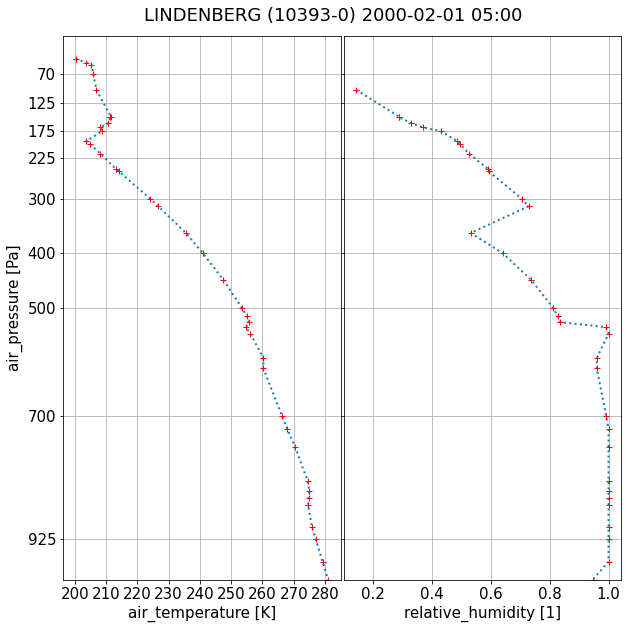

In [46]:
yplevs = np.array([70,125,175,225,300,400,500,700,925])*100.
#
# Select first profile, change dimension to pressure, drop missing values
#
plotdata = tdata.isel(obs=tdata.trajectory_index==0).ta.swap_dims({'obs':'plev'}).to_dataset()
plotdata['hur'] = rdata.isel(obs=rdata.trajectory_index==0).hur.swap_dims({'obs':'plev'})
#
# Plotting
#
with plt.style.context({'font.size': 15, 'lines.linewidth': 2}):
    f, [ax,ay] = subplots(1,2, sharey=True, figsize=(10,10))
    plotdata.ta.dropna('plev').plot(y='plev', marker='+', ls=':', mec='red', ax=ax)
    plotdata.hur.dropna('plev').plot(y='plev', marker='+', ls=':', mec='red', ax=ay)
    # ax.set_yscale('log')
    ax.set_yticks(ticks=yplevs)
    ax.set_yticklabels(map("{:.0f}".format,yplevs/100))
    ax.set_ylim(100000,100)
    ay.set_ylim(100000,100)
    ax.grid()
    ay.grid()
    ay.set_ylabel('')
    subplots_adjust(wspace=0.01)
    f.suptitle("{} {}".format("".join(tdata.station_id.values[-1,:].astype(str)), plotdata.time.dt.strftime("%Y-%m-%d %H:%M").item(0)),y=0.92);

# Request a timeseries

Tasks:
* One Station: `10393`
* Datetime range: ` '20000101-20181231' ` 
* One variables: `air_temperature`
* One pressure level: `500` hPa


In [47]:
t0 = time.time()
# Start Request
r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
               {
                   'variable': ["air_temperature"],
                   'period': '2000-01-01/2019-12-31',
                   'pressure_level': '500',
                   'statid': '10393',
               })
# Start Download
r.download(target='download.zip')
# Check file size
assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
# Unzip the Data Stream
z = zipfile.ZipFile('download.zip')
print("Unzipping retrieved files: to ./exampla_data/3")
print(z.namelist())
z.extractall(path='./example_data/3')
z.close()
os.remove('download.zip')
print("Time elapsed: ", time.time()-t0, "s")

2021-06-25 14:51:47,826 INFO Welcome to the CDS
2021-06-25 14:51:47,828 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-06-25 14:51:48,614 INFO Request is queued
2021-06-25 14:51:49,653 INFO Request is running
2021-06-25 14:51:56,894 INFO Request is completed
2021-06-25 14:51:56,896 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1624625515.4758487-836-6-b3253a0f-f05d-408e-a172-083723892ba0.zip to download.zip (1.5M)
2021-06-25 14:51:57,323 INFO Download rate 3.5M/s   


Unzipping retrieved files: to ./exampla_data/3
['dest_0-20001-0-10393_air_temperature.nc']
Time elapsed:  9.682322978973389 s


## Read NetCDF to xarray

In [48]:
tdata = xr.load_dataset('example_data/3/dest_0-20001-0-10393_air_temperature.nc')

In [49]:
# Again the representation of the NetCDF file, 
# Notice the number of trajectories (13879), this is basically the amount of profiles in the file.
print(tdata)

<xarray.Dataset>
Dimensions:           (obs: 29129, string11: 11, string14: 14, string20: 20, time: 29129, trajectory: 29129)
Coordinates:
    lat               (obs) float32 52.22 52.22 52.22 ... 52.21 52.21 52.21
    lon               (obs) float32 14.12 14.12 14.12 ... 14.12 14.12 14.12
  * obs               (obs) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    plev              (obs) float32 5e+04 5e+04 5e+04 ... 5e+04 5e+04 5e+04
  * string11          (string11) |S1 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
  * string14          (string14) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
  * string20          (string20) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
  * time              (time) datetime64[ns] 2000-01-01T05:00:00 ... 2019-12-3...
  * trajectory        (trajectory) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
Data variables:
    report_id         (obs, string11) |S1 b'1' b'0' b'0' b'0' ... b'1' b'4' b'1'
    station_id        (obs, string20) |S1 b'L' b'I'

## Plot a timeseries

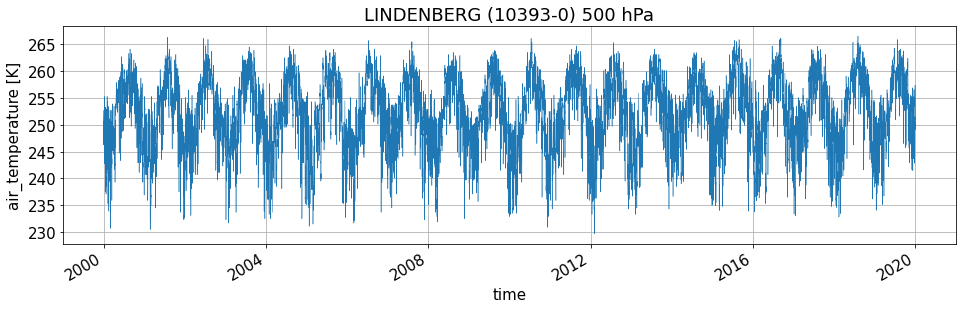

In [53]:
#
# Select 00Z, change dimension to pressure, drop missing values
#
# fix
if tdata.time.dims[0] == 'time':
    tdata['time'] = tdata.time.swap_dims({'time': 'obs'})
plotdata = tdata.ta.to_dataset().swap_dims({'obs':'time'})
#
# Plotting
#
with plt.style.context({'font.size': 15, 'lines.linewidth': 0.5, 'figure.figsize':(16,4)}):
    plotdata.ta.dropna('time').plot(x='time')
    grid()
    title("{} {:.0f} hPa".format("".join(tdata.station_id.values[-1,:].astype(str)), 
                                 plotdata.plev.values[0]/100));

# Request Country
Select radiosondes based on a country code:
* `GLOBE` or `ALL`
* `DEU` for Germany
* `AUT` for Austria
* `GBR` for Great Britain
* `USA` for United States of America

for further Codes and details please search at WMO's [OSCAR](https://oscar.wmo.int/surface/#/)

Tasks:
* Country: `DEU` for Germany
* One day: `20000101 - 20000101`
* Two variables: `temperature`
* One pressure level: `85000`

In [54]:
t0 = time.time()
# Start Request
r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
               {
                   'variable': ["air_temperature"],
                   'year': '2000',
                   'month': '01',
                   'day': '01',
                   'pressure_level': '850',
                   'country': 'DEU',
               })
# Start Download
r.download(target='download.zip')
# Check file size
assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
# Unzip the Data Stream
z = zipfile.ZipFile('download.zip')
print("Unzipping retrieved files: to ./exampla_data/4")
print(z.namelist())
z.extractall(path='./example_data/4')
z.close()
os.remove('download.zip')
print("Time elapsed: ", time.time()-t0, "s")

2021-06-25 14:54:47,871 INFO Welcome to the CDS
2021-06-25 14:54:47,873 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-06-25 14:54:48,870 INFO Request is queued
2021-06-25 14:54:49,910 INFO Request is running
2021-06-25 14:54:51,450 INFO Request is completed
2021-06-25 14:54:51,491 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1624625690.770761-921-8-9a0dc0ae-75a0-4a47-b444-297f11b94aee.zip to download.zip (447.1K)
2021-06-25 14:54:51,804 INFO Download rate 1.4M/s 


Unzipping retrieved files: to ./exampla_data/4
['dest_0-20000-0-10739_air_temperature.nc', 'dest_0-20000-0-10200_air_temperature.nc', 'dest_0-20000-0-10488_air_temperature.nc', 'dest_0-20000-0-10035_air_temperature.nc', 'dest_0-20000-0-10184_air_temperature.nc', 'dest_0-20000-0-10548_air_temperature.nc', 'dest_0-20000-0-10238_air_temperature.nc', 'dest_0-20000-0-10868_air_temperature.nc', 'dest_0-20000-0-10618_air_temperature.nc', 'dest_0-20000-0-10771_air_temperature.nc', 'dest_0-20000-0-89002_air_temperature.nc', 'dest_0-20001-0-10393_air_temperature.nc', 'dest_0-20001-0-10410_air_temperature.nc']
Time elapsed:  4.370563983917236 s


## Read NetCDF to xarray

In [55]:
data = {}
ipath = './example_data/4/'
for ifile in os.listdir(ipath):
    #
    # Load the NetCDF data
    #
    tmp = xr.load_dataset(ipath + ifile)
    if tmp.time.dims[0] == 'time':
        tmp['time'] = tmp.time.swap_dims({'time': 'obs'})
    tmp = tmp.swap_dims({'obs':'time'})
    #
    # Add Sonde ID as coordinate
    #
    ident = "".join(tmp.station_id.values[-1,:].astype(str))
    tmp = tmp.ta
    tmp.coords['sonde'] = ident
    data[ident] = tmp
#
# Make a larger dataset
#
data = xr.concat(data.values(), dim='sonde')

## Merged Dataset

Notice that we have 10 Sondes and 7 launch times.

In [56]:
print(data)

<xarray.DataArray 'ta' (sonde: 13, time: 8)>
array([[268.3 ,    nan,    nan,    nan, 269.7 ,    nan,    nan, 269.5 ],
       [   nan, 271.9 ,    nan,    nan, 271.9 ,    nan,    nan,    nan],
       [   nan, 265.3 ,    nan,    nan, 268.7 ,    nan,    nan,    nan],
       [   nan, 269.7 ,    nan,    nan, 272.3 ,    nan,    nan,    nan],
       [   nan, 266.7 ,    nan,    nan, 267.5 ,    nan,    nan,    nan],
       [   nan, 268.1 ,    nan,    nan, 269.1 ,    nan,    nan,    nan],
       [   nan,    nan, 268.1 ,    nan, 270.9 ,    nan,    nan, 274.2 ],
       [   nan, 268.1 ,    nan,    nan, 268.7 ,    nan,    nan,    nan],
       [   nan,    nan, 269.5 ,    nan, 272.5 ,    nan,    nan, 275.8 ],
       [   nan,    nan,    nan,    nan, 267.5 ,    nan,    nan, 268.1 ],
       [   nan,    nan,    nan, 265.5 ,    nan, 265.45,    nan,    nan],
       [   nan,    nan, 265.9 ,    nan, 266.7 ,    nan, 268.9 , 270.9 ],
       [   nan, 270.9 ,    nan,    nan, 272.7 ,    nan,    nan,    nan]],
     

In [57]:
print(data.count('sonde'))

<xarray.DataArray 'ta' (time: 8)>
array([ 1,  7,  3,  1, 12,  1,  1,  5])
Coordinates:
  * time     (time) datetime64[ns] 1999-12-31T11:00:00 ... 2000-01-01T23:00:00


## Preparing plotdata

In order to have a common datetime we choose here to interpolate to 06Z as a common time.
To do this be need to fill the missing information and linearly interpolate to the time:
1. `interpolate_na`, interpolate missing values, only possible for Vienna, because 04Z and 05Z lie between 00Z and 12Z.
2. `ffill`, forward fill, copies the information to other times.
3. `interp`, linearly interpolates to the wanted time 06Z.
    - Note only for Vienna the value is interpolated between 05Z and 12Z

In [58]:
plotdata = data.interpolate_na('time')  # Interpolate
# reset_coords make lon, lat to variables and allows them to be filled as well, set_coords make lat,lon coordinates again, but filled with information now.
plotdata = plotdata.reset_coords(['lon', 'lat']).ffill('time').bfill('time').set_coords(['lon', 'lat'])
plotdata = plotdata.interp(time='2000-01-01 12:00:00')
print(plotdata.ta)

<xarray.DataArray 'ta' (sonde: 13)>
array([269.68334961, 271.8999939 , 268.70001221, 272.29998779,
       267.5       , 269.1000061 , 271.17498779, 268.70001221,
       272.7749939 , 267.54998779, 265.45001221, 267.06668091,
       272.70001221])
Coordinates:
  * sonde    (sonde) <U33 'STUTTGART/SCHNARRENBERG (10739-0)' ... 'ESSEN-BRED...
    obs      (sonde) float64 nan nan nan nan nan nan nan nan nan nan nan nan nan
    plev     (sonde) float64 nan nan nan nan nan nan nan nan nan nan nan nan nan
    lat      (sonde) float64 48.83 53.38 51.12 54.53 ... 49.43 -70.67 52.22 51.4
    lon      (sonde) float64 9.2 7.23 13.68 9.55 13.4 ... 11.9 -8.25 14.12 6.97
    time     datetime64[ns] 2000-01-01T12:00:00
Attributes:
    cdmname:        observations_table/observation_value
    units:          K
    standard_name:  air_temperature
    cdsname:        temperature


## Plot a map

In [59]:
# Cartopy can not easily be installed on Colab
import cartopy.crs as ccrs
import cartopy as cpy

[6, 18, 46, 55]


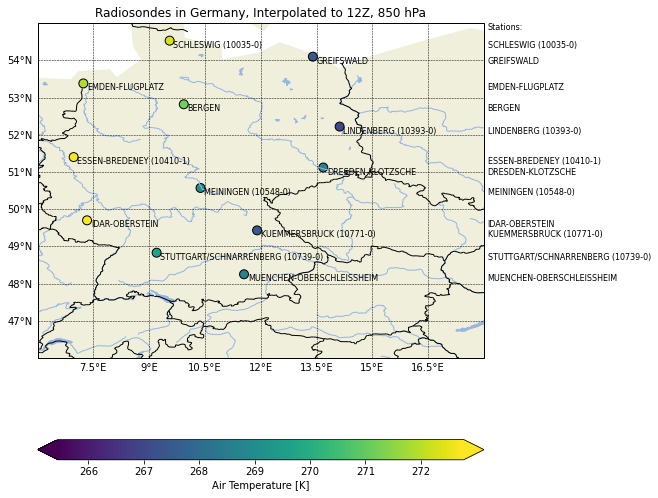

In [60]:
#
# Define the Plot
#
plt.figure(figsize=(8,10))
ax = plt.subplot(projection=ccrs.PlateCarree());
#
# Add Metainformation
#
ax.add_feature(cpy.feature.LAND, zorder=0)
ax.add_feature(cpy.feature.LAKES.with_scale('10m'), zorder=0)
ax.add_feature(cpy.feature.RIVERS.with_scale('10m'), zorder=1)
ax.add_feature(cpy.feature.BORDERS.with_scale('10m'), zorder=1)
#
# Plot the Values
#
cs = ax.scatter(plotdata.lon.values, plotdata.lat.values, 
                s=80,
                c=plotdata.ta.values,
                edgecolor='k',
                transform=ccrs.PlateCarree());
#
# Colorbar
#
cb = plt.colorbar(cs, ax=ax, extend='both', orientation='horizontal')
cb.set_label("Air Temperature [K]")
#
# Add Labels
#
lloffset = [0.1]*plotdata.sonde.size
#boundary = [plotdata.lon.min().item()-2, plotdata.lon.max().item()+2, plotdata.lat.min().item()-1, plotdata.lat.max().item()+1]
# need to set these limits, beacuse of Neumayer Station in the Antarctic
boundary = [6, 18, 46, 55]
print(boundary)
ax.text(boundary[1]+0.1, boundary[3], 'Stations:', horizontalalignment='left', verticalalignment='top',
            transform=cpy.crs.PlateCarree(), fontsize=8, zorder=12,
            clip_on=False)
for i, j, l, k in zip(plotdata.lon.values, plotdata.lat.values, plotdata.sonde.values, lloffset):
    if j < 0:
        continue
    ax.text(i + k, j, "{}".format(l), horizontalalignment='left', verticalalignment='top',
            transform=cpy.crs.PlateCarree(), fontsize=8, zorder=12,
            clip_on=True)
    ax.text(boundary[1]+0.1,j,"{}".format(l), horizontalalignment='left', verticalalignment='top',
            transform=cpy.crs.PlateCarree(), fontsize=8, zorder=12,
            clip_on=False)

ax.set_title("Radiosondes in Germany, Interpolated to 12Z, 850 hPa");

ax.set_extent(boundary, crs=ccrs.PlateCarree())  # (x0, x1, y0, y1) 
#
# Gird lines
#
gl = ax.gridlines(draw_labels=True, xlocs=None, ylocs=None,
                  linewidth=0.5, linestyle='--', color='k')
gl.xformatter = cpy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cpy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
tight_layout()

# Request All Stations for one day



In [61]:
t0 = time.time()
# Start Request
r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
               {
                   'variable': ["air_temperature"],
                   'period': '2000-01-01/2000-01-31',
                   'pressure_level': '850',
                   'statid': 'all',
               })
# Start Download
r.download(target='download.zip')
# Check file size
assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
# Unzip the Data Stream
z = zipfile.ZipFile('download.zip')
print("Unzipping retrieved files: to ./exampla_data/5")
# print(z.namelist())
z.extractall(path='./example_data/5')
z.close()
os.remove('download.zip')
print("Time elapsed: ", time.time()-t0, "s")

2021-06-25 14:56:50,755 INFO Welcome to the CDS
2021-06-25 14:56:50,757 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-06-25 14:56:51,492 INFO Request is queued
2021-06-25 14:56:52,531 INFO Request is running
2021-06-25 14:56:59,776 INFO Request is completed
2021-06-25 14:56:59,817 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1624625817.4520361-997-8-e2f72a82-c931-41d8-bf37-5837a17c55b0.zip to download.zip (27.2M)
2021-06-25 14:57:01,748 INFO Download rate 14.1M/s  


Unzipping retrieved files: to ./exampla_data/5
Time elapsed:  12.242297887802124 s


In [62]:
data = {}
ipath = './example_data/5/'
for ifile in os.listdir(ipath):
    #
    # Load the NetCDF data
    #
    tmp = xr.load_dataset(ipath + ifile)
    if tmp.time.dims[0] == 'time':
        tmp['time'] = tmp.time.swap_dims({'time': 'obs'})
    tmp = tmp.swap_dims({'obs':'time'})
    #
    # Add Sonde ID as coordinate
    #
    ident = "".join(tmp.station_id.values[-1,:].astype(str))
    tmp = tmp.ta
    tmp.coords['sonde'] = ident
    data[ident] = tmp
#
# Make a larger dataset
#
data = xr.concat(data.values(), dim='sonde')

In [63]:
print(data)

<xarray.DataArray 'ta' (sonde: 777, time: 584)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1991-05-08 ... 2000-01-31T23:00:00
    lat      (sonde, time) float32 nan nan nan nan nan ... nan nan nan nan nan
    lon      (sonde, time) float32 nan nan nan nan nan ... nan nan nan nan nan
    obs      (sonde, time) float64 nan nan nan nan nan ... nan nan nan nan nan
    plev     (sonde, time) float32 nan nan nan nan nan ... nan nan nan nan nan
  * sonde    (sonde) <U46 'AKTOBE' 'WIEN/HOHE WARTE (11035-0)' ... 'ESSBEEA'
Attributes:
    cdmname:        observations_table/observation_value
    units:          K
    standard_name:  air_temperature
    cdsname:        temperature


In [64]:
plotdata = data.count('time')
plotdata['lon'] = data.lon.mean('time')
plotdata['lat'] = data.lat.mean('time')

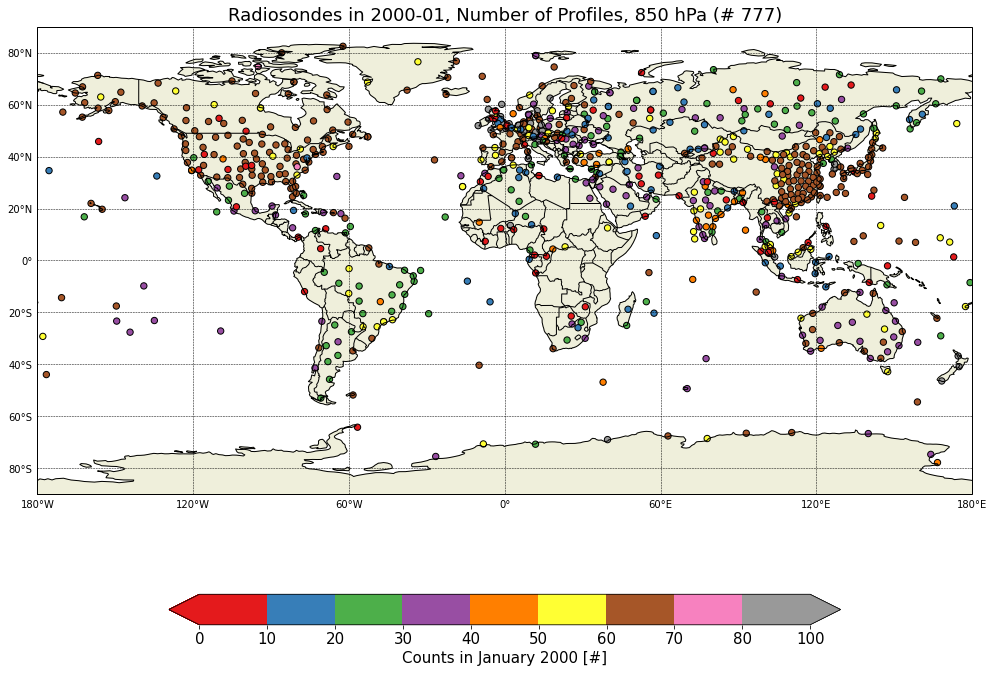

In [65]:
with plt.style.context({'font.size': 15}):

    #
    # Define the Plot
    #
    plt.figure(figsize=(16,10))
    ax = plt.subplot(projection=ccrs.PlateCarree());
    #
    # Add Metainformation
    #
    ax.add_feature(cpy.feature.LAND, zorder=0)
    ax.add_feature(cpy.feature.BORDERS, zorder=1)
    ax.add_feature(cpy.feature.COASTLINE, zorder=1)
    #
    # Plot the Values
    #
    cs = ax.scatter(plotdata.lon.values, plotdata.lat.values, 
                    s=40,
                    c=np.digitize(plotdata.values,[0,10,20,30,40,50,60,70,80,100]),
                    edgecolor='k',
                    transform=ccrs.PlateCarree(),
                    cmap=plt.cm.get_cmap('Set1'));
    #
    # Colorbar
    #
    cb = plt.colorbar(cs, ax=ax, extend='both', orientation='horizontal', shrink=0.6)
    cb.set_label("Counts in January 2000 [#]")
    cb.ax.set_xticklabels([0,10,20,30,40,50,60,70,80,100])
    ax.set_title("Radiosondes in 2000-01, Number of Profiles, 850 hPa (# {})".format(plotdata.count('sonde').item()));
    ax.set_global()
    #
    # Gird lines
    #
    gl = ax.gridlines(draw_labels=True, xlocs=None, ylocs=None,
                      linewidth=0.5, linestyle='--', color='k')
    gl.xformatter = cpy.mpl.gridliner.LONGITUDE_FORMATTER
    gl.yformatter = cpy.mpl.gridliner.LATITUDE_FORMATTER
    gl.xlabels_top = False
    gl.ylabels_right = False
    tight_layout()

# Request a timeseries and convert to cube


Tasks:
* One Station: `10391`
* Datetime range: `20000101 - 20191231`
* One variables: `temperature`
* Background Departures: `obs_minus_bg, obs_minus_an, bias_estimate`
* Standard pressure levels (#16)


In [66]:
t0 = time.time()
# Start Request
r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
               {
                   'variable': ["air_temperature"],
                   'period': '2000-01-01/2019-12-31',
                   'pressure_level':  [10,20,30,50,70,100,150,200,250,300,400,500,700,850,925,1000],
                   'statid': '10393',
                   'optional': ['obs_minus_bg', 'obs_minus_an', 'bias_estimate']
               })
# Start Download
r.download(target='download.zip')
# Check file size
assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
# Unzip the Data Stream
z = zipfile.ZipFile('download.zip')
print("Unzipping retrieved files: to ./exampla_data/6")
print(z.namelist())
z.extractall(path='./example_data/6')
z.close()
os.remove('download.zip')
print("Time elapsed: ", time.time()-t0, "s")

2021-06-25 14:58:27,264 INFO Welcome to the CDS
2021-06-25 14:58:27,265 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-06-25 14:58:28,138 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1624612514.8709993-14697-14-36b05ae8-332a-4af8-b8a2-593e0f18892c.zip to download.zip (16.8M)
2021-06-25 14:58:29,354 INFO Download rate 13.8M/s  


Unzipping retrieved files: to ./exampla_data/6
['dest_0-20001-0-10393_air_temperature.nc']
Time elapsed:  2.3520519733428955 s


## Read NetCDF to xarray

In [67]:
tdata = xr.load_dataset('example_data/6/dest_0-20001-0-10393_air_temperature.nc')

In [68]:
print(tdata)

<xarray.Dataset>
Dimensions:           (phony_dim_3: 29216, time: 440227)
Coordinates:
    lat               (time) float32 52.22 52.22 52.22 ... 52.21 52.21 52.21
    lon               (time) float32 14.12 14.12 14.12 ... 14.12 14.12 14.12
    plev              (time) float32 2e+03 3e+03 5e+03 ... 9.25e+04 1e+05
  * time              (time) datetime64[ns] 2000-01-01T05:00:00 ... 2019-12-3...
Dimensions without coordinates: phony_dim_3
Data variables:
    bias_estimate     (time) float32 -0.08317 -0.04835 -0.07082 ... 0.02694 0.03
    obs_minus_an      (time) float32 0.297 0.5981 -0.5512 ... -0.9196 0.08176
    obs_minus_bg      (time) float32 0.7332 0.4959 -0.832 ... -1.572 0.7128
    report_id         (time) |S11 b'10000011865' ... b'10000041141'
    station_id        (time) |S20 b'LINDENBERG (10393-0)' ... b'LINDENBERG (1...
    ta                (time) float32 201.7 203.1 207.1 ... 272.4 271.1 276.7
    trajectory_index  (time) int32 0 0 0 0 0 0 ... 29215 29215 29215 29215 29215
  

## Read NetCDF to xarray cube

Conversion Function from ragged array to cube

This function can also be found here: [cds-backend](https://github.com/MBlaschek/CEUAS/tree/master/CEUAS/public/cds-backend/code)

In [75]:
import os, sys
euapath = os.getcwd()+'/../cds-backend/code/'
sys.path.append(euapath)
try:
    import cds_eua3 as eua
except:
    print('could not import eua')
    print('please download https://github.com/MBlaschek/CEUAS/blob/master/CEUAS/public/cds-backend/code/cds_eua3.py and save in ', euapath)
    print('or get the whole repository from https://github.com/MBlaschek/CEUAS')

In [114]:
with eua.CDMDataset('example_data/6/dest_0-20001-0-10393_air_temperature.nc') as iofile:
    ident = "".join(iofile.station_id[-1].astype(str))
    cube = iofile.read_data_to_3dcube('ta')
    # fix datum to datetime
    cube['ta']['datum'] = xr.decode_cf(xr.Dataset({'time': cube['ta'].datum}))['datum']
    # or
    #cube = iofile.read_data_to_cube('ta')

2021-06-25 15:17:44,694 INFO [READ] plev : [  1000   2000   3000   5000   7000  10000  15000  20000  25000  30000
  40000  50000  70000  85000  92500 100000] [Pa]
2021-06-25 15:17:44,792 INFO [CUBE] ta (440227,) (2, 16, 7299)


In [115]:
print(cube['ta'])

<xarray.DataArray 'ta' (hour: 2, press: 16, datum: 7299)>
array([[[   nan, 202.3 ,    nan, ..., 220.16, 217.14, 211.51],
        [201.7 , 201.9 , 202.5 , ..., 212.07, 209.93, 206.04],
        [203.1 , 201.7 , 207.7 , ..., 208.7 , 208.67, 205.21],
        ...,
        [265.9 , 270.9 , 270.1 , ..., 279.55, 274.5 , 272.37],
        [270.1 , 272.9 , 275.  , ..., 281.16, 274.55, 271.15],
        [272.7 , 274.2 , 275.8 , ..., 275.4 , 277.54, 276.69]],

       [[204.3 , 202.9 , 203.5 , ..., 214.5 , 216.79,    nan],
        [202.7 , 201.7 , 203.7 , ..., 212.33, 208.65,    nan],
        [203.5 , 206.9 , 207.9 , ..., 207.74, 206.13,    nan],
        ...,
        [268.9 , 275.8 , 274.2 , ..., 281.58, 272.77,    nan],
        [271.7 , 271.7 , 276.2 , ..., 283.56, 272.84,    nan],
        [273.8 , 276.  , 278.  , ..., 279.81, 278.17,    nan]]],
      dtype=float32)
Coordinates:
  * hour     (hour) int64 0 12
  * press    (press) float64 10.0 20.0 30.0 50.0 ... 700.0 850.0 925.0 1e+03
  * datum    (

## Plot a timeseries

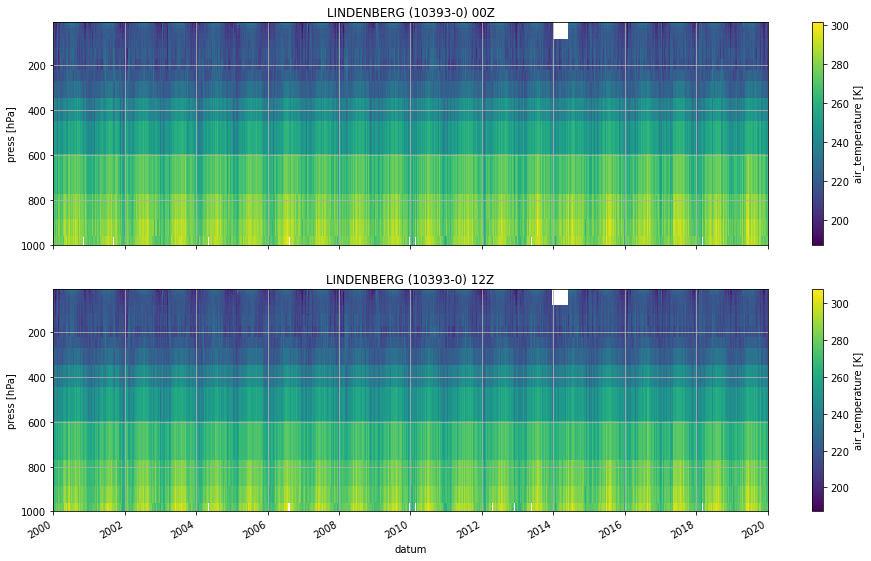

In [116]:
#
# Plotting
#
f, [ax,ay] = subplots(2,1, sharex=True, sharey=True, figsize=(16,9))
cube['ta'].sel(hour=0).plot(x='datum', y='press', ax=ax)
cube['ta'].sel(hour=12).plot(x='datum', y='press', ax=ay)
ax.grid()
ax.set_xlabel('')
ay.grid()
ax.set_ylim(1000,10)
ax.set_title("{} {:02d}Z".format(ident, 0));
ay.set_title("{} {:02d}Z".format(ident, 12));

## Plot a profile

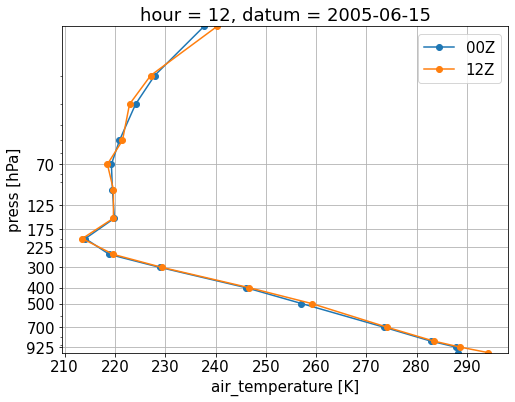

In [118]:
with plt.style.context({'font.size': 15,'figure.figsize':(8,6)}):
    cube['ta'].sel(hour=0, datum='2005-06-15').plot(y='press', marker='o', label='00Z')
    cube['ta'].sel(hour=12, datum='2005-06-15').plot(y='press', marker='o', label='12Z')
    ylim(1000,10)
    grid()
    legend()
    yscale('log')
    yticks(ticks=yplevs/100, labels=map("{:.0f}".format,yplevs/100));